In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test/255.0

In [3]:
print('X_train shape', X_train.shape)

X_train shape (60000, 28, 28)


In [4]:
# expand dimentions as conv expects 3d data
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [5]:
print('X_train shape', X_train.shape)

X_train shape (60000, 28, 28, 1)


In [6]:
# Number of classes
K = len(set(y_train))
print('No. of classes',K)

No. of classes 10


In [7]:
# Build model (Functional API)
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=1, activation='relu')(i)
x = Conv2D(64, (3,3), strides=1, activation='relu')(x)
x = Conv2D(128, (3,3), strides=1, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [8]:
# Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3710 - accuracy: 0.8643 - val_loss: 0.2982 - val_accuracy: 0.8857
Epoch 2/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2291 - accuracy: 0.9152 - val_loss: 0.2633 - val_accuracy: 0.9020
Epoch 3/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1652 - accuracy: 0.9388 - val_loss: 0.2409 - val_accuracy: 0.9195
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1118 - accuracy: 0.9584 - val_loss: 0.2590 - val_accuracy: 0.9196
Epoch 5/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0762 - accuracy: 0.9725 - val_loss: 0.3086 - val_accuracy: 0.9222
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0591 - accuracy: 0.9786 - val_loss: 0.3531 - val_accuracy: 0.9171
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0407 - accuracy: 0.9856 - val_loss: 0.4122 -

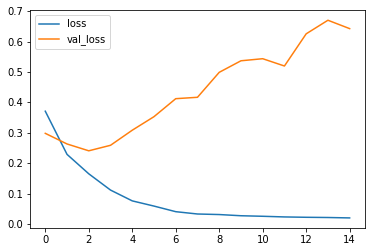

In [9]:
# Plot loss graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

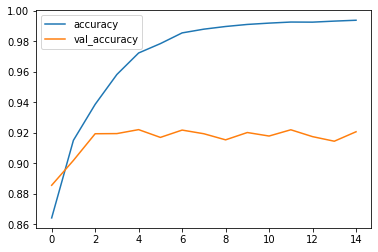

In [10]:
# Plot accuracy graph
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.6425 - accuracy: 0.9208
[0.6425458788871765, 0.920799970626831]


In [12]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix without normalization
[[877   0  11   8   3   1  96   0   4   0]
 [  2 984   0   8   3   0   1   0   2   0]
 [ 17   1 869   7  45   0  56   0   5   0]
 [ 20   2   5 932  21   0  20   0   0   0]
 [  1   1  47  25 869   0  57   0   0   0]
 [  0   0   0   0   0 983   0  12   0   5]
 [ 91   1  49  19  54   0 776   0  10   0]
 [  0   0   0   0   0  10   0 977   0  13]
 [  3   0   2   5   1   1   2   2 982   2]
 [  0   0   0   0   0  11   0  30   0 959]]


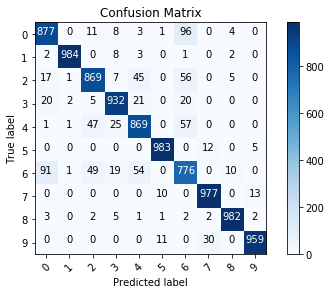

In [13]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

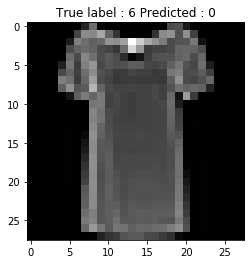

In [14]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(np.squeeze(X_test)[i], cmap='gray')
plt.title('True label : %s Predicted : %s' % (y_test[i], p_test[i]))
plt.show()